## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
print("Shape of the data is",df.shape)
print("Number of rows in data",len(df.index))

Shape of the data is (294478, 5)
Number of rows in data 294478


c. The number of unique users in the dataset.

In [5]:
print("Number of unique users in data are",df['user_id'].nunique())

Number of unique users in data are 290584


d. The proportion of users converted.

In [6]:
prop_conv = len(df[df['converted']==1])/len(df.index)
print("Proportion of converted users are:", prop_conv)

Proportion of converted users are: 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [7]:
#  number of times when group is not treatment but landing page is new page
gr1 = len(df[(df['group']!="treatment") & (df['landing_page']=="new_page")])
#  number of times when group is not control but landing page is old page
gr2 = len(df[(df['group']!="control") & (df['landing_page']=="old_page")])
# sum of both
gr1_and_gr2 = gr1 + gr2
print("Number of times when the new_page and treatment don't match are: ",gr1_and_gr2)

Number of times when the new_page and treatment don't match are:  3893


In [8]:
# The number of times when the "group" is treatment but "landing_page" is not a new_page.
gr1 = len(df[(df['group']=="treatment") & (df['landing_page']!="new_page")])
print("The number of times when the 'group' is treatment but 'landing_page' is not a new_page: ", gr1)

The number of times when the 'group' is treatment but 'landing_page' is not a new_page:  1965


f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No, there are no null values neither in rows nor columns

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df.copy()
# data where the treatment does not match with new_page or control doesnot match with old_page
df2 = df[((df.group=='treatment') & (df.landing_page=='new_page')) | ((df.group=='control') & (df.landing_page=='old_page'))]

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
print("Number of unique user_ids are: ",df2['user_id'].nunique())

Number of unique user_ids are:  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
# checking for the duplicate user_id in df2
print("The duplicated user id is: ",df2['user_id'][df2['user_id'].duplicated()].values)

The duplicated user id is:  [773192]


c. What is the row information for the repeat **user_id**?

In [15]:
print("The row information for duplicated user_id:")
df2.loc[df2['user_id'].duplicated()]

The row information for duplicated user_id:


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# dropping duplicates
print(df2.shape)
df2 = df2.drop_duplicates(subset='user_id')
print(df2.shape)

(290585, 5)
(290584, 5)


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
print("The probability of an individual converting regardless of the page they receive are: ",df2['converted'].mean())

The probability of an individual converting regardless of the page they receive are:  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# required two frames one of only control group and the other where he is in control and is converted
only_control = df2[df2['group']=='control']
both_control_converted = df2[(df2['group']=='control') & (df2['converted']==1)]
print("Probability of individual being in control group and converted are:", len(both_control_converted)/len(only_control))

Probability of individual being in control group and converted are: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# required two frames one of only treatment group and the other where he is in treatment and is converted
only_treatment = df2[df2['group']=='treatment']
both_treatment_converted = df2[(df2['group']=='treatment') & (df2['converted']==1)]
print("Probability of individual being in treatment group and converted are:", len(both_treatment_converted)/len(only_treatment))

Probability of individual being in treatment group and converted are: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [20]:
print("Probability that an individual received new page is:", df2['landing_page'].value_counts()[0]/len(df.index))

Probability that an individual received new page is: 0.4934494257635545


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer**
- The control group showed a slightly higher number of conversions compared to the treatment group based on the total number of users who converted.
- The conversion rate in the control group was 12.04%, while in the treatment group, it was 11.88%.
- The difference between the two groups is very subtle, suggesting that there is no significant advantage for either page in terms of converting more users.
- The probability of an individual converting given that they are in the control group is 12.04%, while the probability of conversion given that they are in the treatment group is 11.88%.
- Based on the analysis, it is evident that there is no significant difference in conversion rates between the new page and the old page. Therefore, it is crucial to consider other factors in evaluating the effectiveness of the pages.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**
- Null Hypothesis (H0): The conversion rate of the new page is less than or equal to the conversion rate of the old page.
- Alternative Hypothesis (H1): The conversion rate of the new page is greater than the conversion rate of the old page.
- The null hypothesis assumes that there is no significant difference in the conversion rates between the new and old pages, while the alternative hypothesis suggests that the new page has a higher conversion rate.
- We will use a p-value threshold of 5% (0.05) to determine the significance level. If the calculated p-value is less than 0.05, we reject the null hypothesis and conclude that the new page has a higher chance of converting users. If the p-value is equal to or greater than 0.05, we fail to reject the null hypothesis and cannot conclude that the new page has a higher conversion rate.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null?

In [21]:
p_new = df2['converted'].sum() / df2.shape[0]
print("Conversion rate for p_new under the null is: ",p_new)

Conversion rate for p_new under the null is:  0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2['converted'].sum() / df2.shape[0]
print("Conversion rate for p_old under the null is: ",p_old)

Conversion rate for p_old under the null is:  0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new = (df2[df2["group"] == 'treatment']).shape[0]
print("Number of individuals in treatment group are: ", n_new)

Number of individuals in treatment group are:  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = (df2[df2["group"] == 'control']).shape[0]
print("Number of individuals in control group are: ", n_old)

Number of individuals in control group are:  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# Binomial can be used for this conversion
new_page_converted = np.random.binomial(1,p_new,n_new)
# # There is also a different way which can be implemented for the same
# new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
new_page_converted.mean()

0.12048723418897529

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(1,p_old,n_old)
# There is also a different way which can be implemented for the same
#old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
old_page_converted.mean()

0.11838319313848314

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
diff = p_new - p_old
print("The difference between pnew and pold is:", diff)

The difference between pnew and pold is: 0.0


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
# running the same simulation over 10000 times
p_diffs = []

for t_ in range(10000):
    new_page_convert = np.random.binomial(1,p_new,n_new).mean()
    old_page_convert = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(new_page_convert - old_page_convert)

print(p_diffs[:5])

[0.0006172449592420776, 0.000465694432313285, -0.0012475730580067679, 0.00047964399550533277, 0.0014638322164093193]


In [29]:
print(type(p_diffs))
# As it is a list so let us convert this into numpy array
p_diffs = np.array(p_diffs)
print(type(p_diffs))

<class 'list'>
<class 'numpy.ndarray'>


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

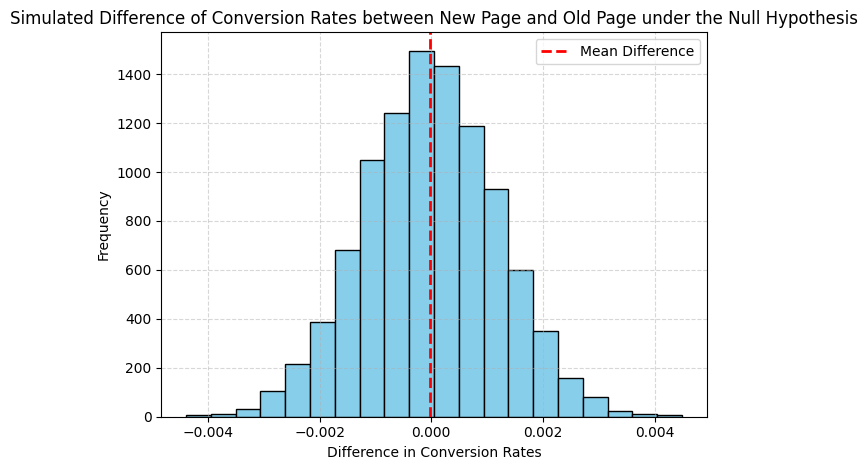

In [30]:
# Plot the sampling distribution
plt.hist(p_diffs, bins=20, color='skyblue', edgecolor='black')  # Customize the number of bins and color
plt.xlabel('Difference in Conversion Rates')
plt.ylabel('Frequency')
plt.title('Simulated Difference of Conversion Rates between New Page and Old Page under the Null Hypothesis')
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)
# Add mean line
mean_diff = np.mean(p_diffs)
plt.axvline(mean_diff, color='red', linestyle='--', linewidth=2, label='Mean Difference')
# Add legend
plt.legend()
# Add additional styling
plt.tight_layout()
# Display the histogram
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
df_cont = df2[df2['group'] == "control"]
df_treat = df2[df2['group'] == "treatment"]

# Checking the  observed difference
observed_diff = df_treat['converted'].mean() - df_cont['converted'].mean()
print("The observed difference is: ", observed_diff)

The observed difference is:  -0.0015782389853555567


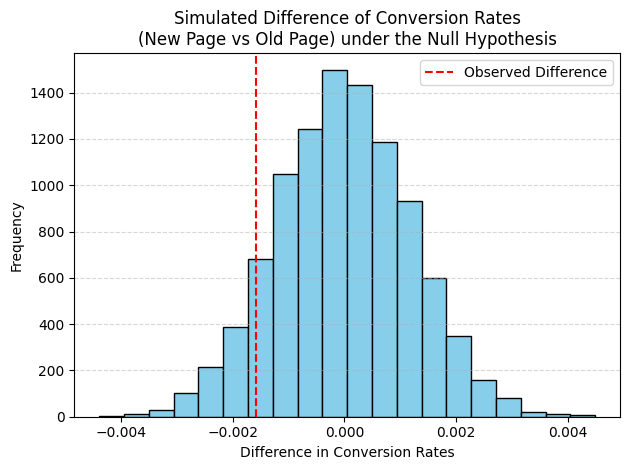

In [34]:
# Plotting the histogram for the simulated differences of new_page and old_page converted under the null hypothesis
plt.hist(p_diffs, bins=20, color='skyblue', edgecolor='black')
# Adding a vertical line for the observed difference
plt.axvline(x=observed_diff, color='red', linestyle='--', label="Observed Difference")
# Adding labels and title to the plot
plt.xlabel('Difference in Conversion Rates')
plt.ylabel('Frequency')
plt.title('Simulated Difference of Conversion Rates\n(New Page vs Old Page) under the Null Hypothesis')
# Adding a legend
plt.legend()
# Improving the aesthetics of the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# Displaying the plot
plt.show()

In [35]:
#calculating the proportion of p_diffs > than observed diff
(p_diffs > observed_diff).mean()

0.9071

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

The proportion of p_diffs greater than the observed difference in the ab_data.csv, which is 90.79%, is commonly referred to as the p-value in scientific studies. This p-value indicates that we do not have enough evidence to reject the null hypothesis. Therefore, we cannot conclude that the new_page has a higher conversion rate than the old_page based on the available data.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old =  len(df2[(df2['landing_page']=='old_page') & (df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page') & (df2['converted']==1)])
n_old = len(df2[df2['landing_page']=="old_page"])
n_new = len(df2[df2['landing_page']=="new_page"])

In [37]:
convert_new, convert_old, n_new, n_old

(17264, 17489, 145310, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [38]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)
print("Z-Score is: ",z_score)
print("P-value is: ",p_value)

Z-Score is:  1.3109241984234394
P-value is:  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

Based on the obtained z-score and p-value, it can be concluded that there is insufficient evidence to reject the Null hypothesis. The Null hypothesis suggests that the converted rate of the old_page is equal to or greater than the converted rate of the new_page. The calculated p-value of 0.91 is greater than the significance level of 0.05, indicating that there is not enough statistical significance to confidently claim that the converted rate of the new_page is higher than that of the old_page with a 95% confidence level. Therefore, the results do not provide strong support for the alternative hypothesis and suggest that the new_page may not have a higher converted rate compared to the old_page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

The target variable in this scenario is a binary variable, representing whether a conversion has occurred or not. To analyze and model this data effectively, it is recommended to utilize logistic regression. Logistic regression is specifically designed for binary classification problems, allowing us to assess the relationship between the independent variables and the probability of conversion. By fitting a logistic regression model, we can obtain insights into the factors that influence the likelihood of a conversion taking place, enabling us to make informed predictions and draw meaningful conclusions from the data.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
# encoding two features
df2[['control','treatment']]= pd.get_dummies(df2['group'])
df2 = df2.drop('control',axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [40]:
df3 = df2.rename(columns={'treatment': 'ab_page'})
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
from scipy import stats
stats.chisqprob = lambda chisqu, df3: stats.chi2.sf(chisqu, df3)

df3['intercept'] = 1

lm = sm.Logit(df3['converted'],df3[['intercept','ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Jul 2023   Pseudo R-squ.:               8.077e-06
Time:                        15:51:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Jul 2023   Pseudo R-squ.:               8.077e-06
Time:                        15:51:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

Upon analyzing the results of the logit regression, we observe the following:

- The dependent variable in this analysis is "converted," representing whether a conversion has occurred or not. The total number of observations in the dataset is 290,584.
- The logistic regression model has been employed using the maximum likelihood estimation (MLE) method.
- The model includes one independent variable, "ab_page," which is related to the page type (new or old) and its coefficient is -0.0150. This coefficient indicates the impact of the page type on the conversion rate.
- The pseudo R-squared value, a measure of the model's goodness of fit, is very small (8.077e-06), suggesting that the independent variable explains only a small portion of the variation in the dependent variable.
- The log-likelihood of the model is -1.0639e+05, indicating how well the model predicts the observed data.
- The model has converged, meaning that the optimization algorithm has successfully found the maximum likelihood estimates for the coefficients.
- The intercept term has a coefficient of -1.9888 and is statistically significant, with a z-value of -246.669.
- The p-value associated with the "ab_page" variable is 0.190, which is greater than the conventional threshold of 0.05. This suggests that there is no strong evidence to reject the null hypothesis that the page type has no effect on the conversion rate.

Overall, based on these observations, it appears that the page type (new or old) does not have a significant impact on the conversion rate, as indicated by the non-significant coefficient and p-value for the "ab_page" variable.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer**

The p-value associated with the variable "ab_page" is calculated to be 0.19, which exceeds the significance level of 0.05. Therefore, based on this result, the coefficient of "ab_page" is considered to be statistically insignificant.

In the alternative hypothesis formulated in Part II, it was assumed that the conversion rate of the old_page is lower than the conversion rate of the new_page, in a one-tailed test. However, in Part III, the alternative hypothesis was expanded to consider two possibilities: (1) the landing_page type has an influence, either positive or negative, on the conversion rate, or (2) the conversion rate of the old_page is different from the conversion rate of the new_page, in a two-tailed test.

However, neither of these alternative hypotheses is supported by the results obtained. The p-values in both cases differ significantly. In Part II, the p-value was calculated to be 0.91. This discrepancy in p-values could be attributed to the fact that the tests conducted in the regression model (not the A/B test) assume the presence of an intercept, as well as differences in the use of one-tailed or two-tailed testing.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

Exploring additional factors is a valuable approach to uncover potential influences on the conversion rate beyond the ones initially considered. By considering other variables, we can gain a more comprehensive understanding of the factors that impact the conversion rate. However, it is important to note that incorporating additional factors may result in a more complex model. The complexity of the model can make it more challenging to interpret and may require additional computational resources. Therefore, it is crucial to carefully weigh the benefits of including additional factors against the potential drawbacks of increased complexity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables.

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
county_df = pd.read_csv('countries.csv')
new_df = county_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')

In [44]:
new_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [45]:
new_df['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [46]:
# conversion rate mean
new_df['ab_page'].mean()

0.5000619442226688

In [47]:
# conversion rate mean by country
new_df.groupby(['country'], as_index=False).mean()

<ipython-input-47-e4e0a3242bc7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df.groupby(['country'], as_index=False).mean()


,country,converted,ab_page,intercept
0,CA,0.115318,0.503552,1.0
1,UK,0.120594,0.498247,1.0
2,US,0.119547,0.500459,1.0


In [48]:
# conversion rate mean grouped by landing_page
new_df.groupby(['ab_page'], as_index=False).mean()

<ipython-input-48-119d102ec4a6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df.groupby(['ab_page'], as_index=False).mean()


,ab_page,converted,intercept
0,0,0.120386,1.0
1,1,0.118808,1.0


In [49]:
# Creating the required dummy variables
new_df[['CA','UK', 'US']]= pd.get_dummies(new_df['country'])

In [50]:
new_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [51]:
### Fit Your Linear Model And Obtain the Results
new_df['intercept'] = 1
linear_model = sm.Logit(new_df['converted'],new_df[['intercept','ab_page','CA','US']])
summary = linear_model.fit()
summary.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Jul 2023   Pseudo R-squ.:               2.323e-05
Time:                        15:51:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

The analysis suggests that the country variable does not significantly influence the conversion rate. This conclusion is supported by the p-values obtained for the two dummy country variables, which exceed the threshold of 0.05 commonly used for statistical significance. It is worth noting that the p-value for the CA variable approaches the 0.05 threshold, indicating a relatively weaker association compared to the other country variables. Overall, the results indicate that the country factor does not have a substantial impact on the conversion rate, as supported by the statistical analysis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

To analyze the potential interactions between the landing page and the conversion rate, we examined the mean conversion rate for each country and landing page combination. This allowed us to determine whether the influence of the landing page on the conversion rate varied across different countries. By calculating the mean conversion rate for each combination, we could identify any patterns or differences that might indicate an interaction effect. This analysis provided insights into how the landing page might impact the conversion rate differently depending on the country, contributing to a more comprehensive understanding of the overall relationship between the variables.

In [52]:
new_df.groupby(['country','ab_page'], as_index=False).mean()

<ipython-input-52-92108beee43c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df.groupby(['country','ab_page'], as_index=False).mean()


,country,ab_page,converted,intercept,CA,UK,US
0,CA,0,0.118783,1.0,1.0,0.0,0.0
1,CA,1,0.111902,1.0,1.0,0.0,0.0
2,UK,0,0.120022,1.0,0.0,1.0,0.0
3,UK,1,0.121171,1.0,0.0,1.0,0.0
4,US,0,0.120630,1.0,0.0,0.0,1.0
5,US,1,0.118466,1.0,0.0,0.0,1.0


Upon analyzing an interaction, the objective is to investigate whether the impact of the landing page varies based on geographical regions, specifically focusing on the United States (US) compared to other countries, or Canada in contrast to other countries. This examination aims to identify potential differences in user response and engagement with the landing page, shedding light on potential variations in effectiveness based on geographical context.

In [53]:
new_df['interaction_us_ab_page'] = new_df['US'] *new_df['ab_page']
new_df['interaction_ca_ab_page'] = new_df['CA'] *new_df['ab_page']
new_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,interaction_us_ab_page,interaction_ca_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0


In [54]:
new_df['intercept'] = 1
model = sm.Logit(new_df['converted'],new_df[['intercept','ab_page','US','interaction_us_ab_page','CA','interaction_ca_ab_page']])
summary = model.fit()
summary.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 08 Jul 2023   Pseudo R-squ.:               3.482e-05
Time:                        15:51:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page                    0.0108      0.023      0.475      0.635      -0.034       0.056
US                         0.0057      0.019      0.306      0.760      -0.031       0.043
interaction_us_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
CA                        -0.0118      0.040     -0.296      0.767      -0.090       0.066
interaction_ca_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==========================================================================================
"""

Based on the logistic regression results, the analysis was performed on a dataset with 290,584 observations. The model showed that the intercept has a statistically significant negative effect on the probability of conversion, with a coefficient of -1.9922. However, the coefficient for the ab_page variable, representing the new_page, is not statistically significant, indicating that there is no strong evidence to suggest that the new_page has a significant impact on the conversion rate. Similarly, the variables representing the countries US and CA do not have statistically significant effects on the conversion rate. The interaction terms between the countries and the page do not show significant associations with the conversion rate either. The pseudo R-squared value is very low, suggesting that the model does not explain a substantial portion of the variation in the data. The p-values for the coefficients also indicate that none of the variables have a significant impact on the conversion rate at the conventional significance level of 0.05.

### Summary and conclusion on regression
The p-values obtained for both interaction terms in the analysis are greater than the threshold of 0.05. This suggests that there is no significant difference in the influence of the landing page between the US and the other countries, as well as between Canada and the other countries.

Therefore, we can conclude that the effect of the landing page on user behavior is not significantly different across these geographical regions.

### Conclusion

Based on the analysis conducted using probability figures, A/B testing, and regression, it can be concluded that there is insufficient evidence to suggest that the new_page leads to a higher conversion rate compared to the old_page. Furthermore, the data does not provide strong indications that the countries of the users (US, CA, and UK) have a significant influence on the conversion rate. Given the large sample size, it is unlikely that further testing of the new_page would yield different results. Therefore, it is recommended to shift the focus towards developing a new landing page rather than continuing to test the current one.